<a href="https://colab.research.google.com/github/Skye-nh/Thinkful_Projects/blob/main/Final_Capstone_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>Connect to personal Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


>>Import necessary packages, and import data from drive.

The dataset utlized comes from a csv file on Google Drive downloaded from Kaggle. To access data, click the Google Drive csv link below, and select "Add Shortcut to Drive" and save the file to "My Drive". Make sure the title of the document remains "Final_Capstone_Data.csv".

Google Drive csv link (USE THIS LINK TO IMPORT DATA): https://drive.google.com/file/d/1FYPVxqs9oL6c_Fyl-6U7DIJyi_j3LMJk/view?usp=sharing

link to dataset origin on Kaggle (for reference):https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?resource=download

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
    
df = pd.read_csv('/content/gdrive/My Drive/Final_Capstone_Data.csv')

>>Check to see if data has any null values.

In [ ]:
df.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


>>There are no null values in the dataset; however, there are three column headers that need correcting. The header 'average_montly_hours" misspells "monthly", and the headers "Work_accident" and "Department" use inconsistent capitalization. 

The following code renames the dataset, and corrects these errors.

In [ ]:
hr_df = df.rename (columns = {'average_montly_hours': 'average_monthly_hours',
                              'Work_accident': 'work_accident',
                              'Department': 'department'})
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Goals for Analysis:**

Now the dataset is ready to be analyzed.

This dataset reviews 10 keys indicators (11 columns) for approximately 15,000 employees (14, 999 records). 

The goal for this analysis is to determine what factors increase employee retention in the workplace. The following analysis will determine if salary and whether an employee has received a promotion in the last five years have a significant impact on employees' reported satisfaction levels.

First, it needs to be known if reported satisfaction level has a significant impact on whether an employee will stay with their company or leave their company.

**Hypothesis 1:**

Ho: There will not be a significant difference in satisfaction levels for employees who stayed at their company and those who left.

Ha: There will be a significant difference in satisfaction levels for employees who stayed at their company and those who left.


In [ ]:
hr_df.groupby('left').mean()['satisfaction_level']

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

>>Create a boxplot to visually display the mean difference in reported satisfaction levels between employees who stayed at their company and those who left their copmany.

Text(0.5, 1.0, 'Mean Satisfaction Levels versus Whether Employees Left the Company')

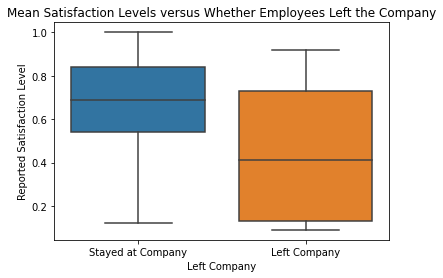

In [ ]:
sns.boxplot(y='satisfaction_level', x='left', data = hr_df )
plt.xlabel ('Left Company')
plt.ylabel ('Reported Satisfaction Level')
plt.xticks ([0,1], ['Stayed at Company','Left Company'])
plt.title ('Mean Satisfaction Levels versus Whether Employees Left the Company')

>>The boxplot indicates there is a difference in means of reported satisfaction levels between employees who stayed at their company and those who left their company.

The following lines of code will test if this difference is significant.

>>Define selected data that corresponds to employees who stayed at their company (0) and those who left their company (1).

In [ ]:
stayed_at_company = hr_df.iloc[(df['left'] == 0).values]

In [ ]:
left_company =  hr_df.iloc[(df['left'] == 1).values]

>>Run an independent sample t-test comparing the means in reported job satisfaction between employees who stayed at their company and those who left their company.

In [ ]:
stats.ttest_ind(stayed_at_company['satisfaction_level'], left_company['satisfaction_level'])

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

**Hypothesis 1 Findings:**

**Null hpothesis rejected.**

There is a significant difference in reported job satisfaction between employees who stayed at their company and those who left their company. This means employees who stayed with the company will report a higher level in job satisfaction. 

>>The first hypothesis confirms that reported job satisfaction is a good indicator of whether an employee will stay with their company or leave their company.

The following two hypotheses will test if employees who have recieved a promotion in the last five years and employees who report a "medium" or "high" salary will report higher job satisfaction.

**Hypothesis 2:**

Ho: There will not be a significant difference in satisfaction levels for employees who received a promotion in the last five years and those who did not.

Ha: There will be a significant difference in satisfaction levels for employees who received a promotion in the last five years and those who did not.

In [ ]:
hr_df.groupby('promotion_last_5years').mean()['satisfaction_level']

promotion_last_5years
0    0.611895
1    0.656019
Name: satisfaction_level, dtype: float64

>>Create a boxplot to visually display the mean difference in reported satisfaction levels between employees who received a promotion in the last five years and those who did not.

Text(0.5, 1.0, 'Mean Satisfaction Levels versus Promotion Received')

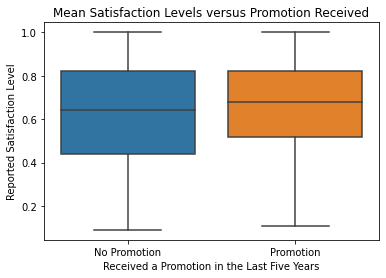

In [ ]:
sns.boxplot(y='satisfaction_level', x='promotion_last_5years', data = hr_df )
plt.xlabel ('Received a Promotion in the Last Five Years')
plt.ylabel ('Reported Satisfaction Level')
plt.xticks ([0,1], ['No Promotion','Promotion'])
plt.title ('Mean Satisfaction Levels versus Promotion Received')


>>The boxplot indicates there is a difference in means of reported satisfaction levels between employees who received a promotion in the last five years and those who did not.

The following lines of code will test if this difference is significant.

>>Define selected data that corresponds to employees who recieved a promotion in the last five years (1) and those who have not (0).

In [ ]:
received_promotion = hr_df.iloc[(df['promotion_last_5years']== 1).values]

In [ ]:
no_promotion = hr_df.iloc[(df['promotion_last_5years']==0).values]

>>Run an independent sample t-test comparing the means in reported job satisfaction between employees who recieved a promotion in the last five years to those who have not.

In [ ]:
stats.ttest_ind(received_promotion['satisfaction_level'], no_promotion['satisfaction_level'])

Ttest_indResult(statistic=3.1366967917856816, pvalue=0.0017119316267238923)

**Hypothesis 2 Findings:**

**Null hypothesis rejected.**

There is a significant difference in reported job satisfaction between employees who recieved a promotion in the last five years and those who did not. This means employees who have recieved a promotion in the five years will report a higher level in job satisfaction. 

**Hypothesis 3:**

Ho: There will not be a significant difference in satisfaction levels for employees with medium to high salaries and those with low salaries.

Ha: There will be a significant difference in satisfaction levels for employees with medium to high salaries and those with low salaries.



In [ ]:
hr_df.groupby('salary').mean()['satisfaction_level']

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

>>Create a boxplot to visually display the mean difference in reported satisfaction levels between employees based on salary range.

Text(0.5, 1.0, 'Mean Satisfaction Levels versus Salary')

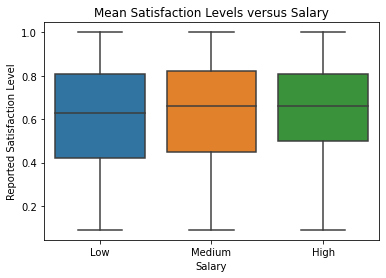

In [ ]:
sns.boxplot(y='satisfaction_level', x='salary', data = hr_df )
plt.xlabel ('Salary')
plt.ylabel ('Reported Satisfaction Level')
plt.xticks ([0,1,2], ['Low','Medium','High'])
plt.title ('Mean Satisfaction Levels versus Salary')

>>The boxplot indicates there is a difference in means of reported satisfaction levels between employees based on salary range.

The following lines of code will test if there is a significant difference between employees with medium to high salaries and those with low salaries.

>>Define selected data that corresponds to employees with medium or high salaries and those with low salaries.

In [ ]:
medium_high_salary = hr_df.loc [(df['salary'] == 'medium') | (df['salary'] == 'high').values]

In [ ]:
low_salary = hr_df.iloc[(df['salary'] == 'low').values]

>>Run an independent sample t-test comparing the means in reported job satisfaction between employees with medium to high salaries and those with low salaries.

In [ ]:
stats.ttest_ind(medium_high_salary['satisfaction_level'], low_salary['satisfaction_level'])

Ttest_indResult(statistic=5.81303188427904, pvalue=6.2598139677876395e-09)

**Hypothesis 3 Findings:**

**Null hpothesis rejected.**

There is a significant difference in reported job satisfaction between employees with medium to high salaries and those with low salaries. This means employees who have recieved a medium or high salary will report a higher level in job satisfaction. 

**Final Recommendations To Increase Employee Retention:**

Reported employee satisfaction has a significant impact on whether employees will stay at their company or leave their company. Employee satisfaction can be increased or maintained at a high level by implementing the following:

1. Increasing opportunities for promotions in the workplace. This could include discussing employee's goals in the company during employee evaluations and emphasizing promoting within the company.

2. Increasing employees' salaries. This could include having a baseline increase corresponding to the company's increase in revenue and rates of inflation as well as offering additional raises and/or bonuses to employees displaying exceptional performance.

Implementing these recommendations will increase employees' reported job satisfaction, and in turn, will result in an increase in employee retention.